Missing values in Customers: 
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products: 
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions: 
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Descriptive statistics for Customers: 
                 SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00

Descriptive statistics for Products: 
             Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Descriptive statistics for Transactions: 
                      TransactionDate     Quantity   TotalValue       Price
c

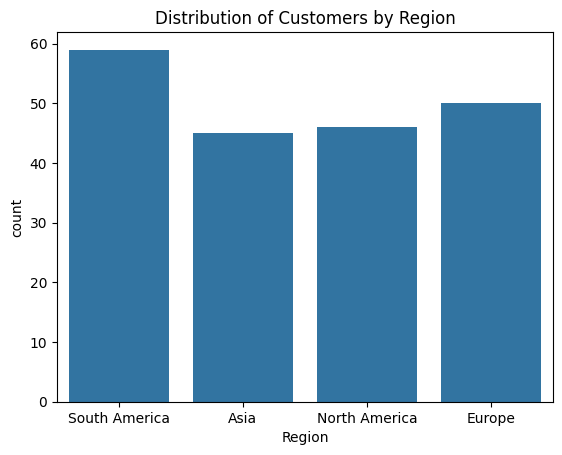

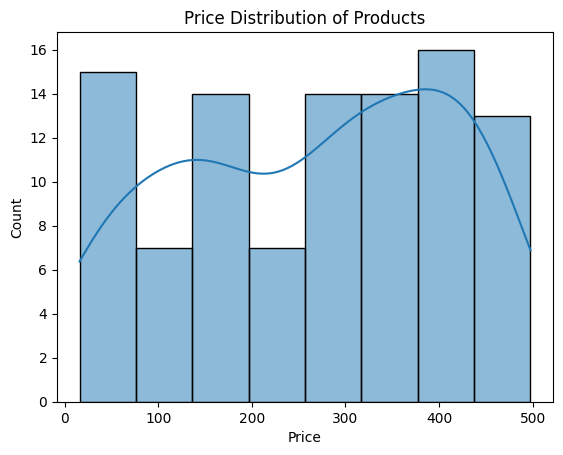

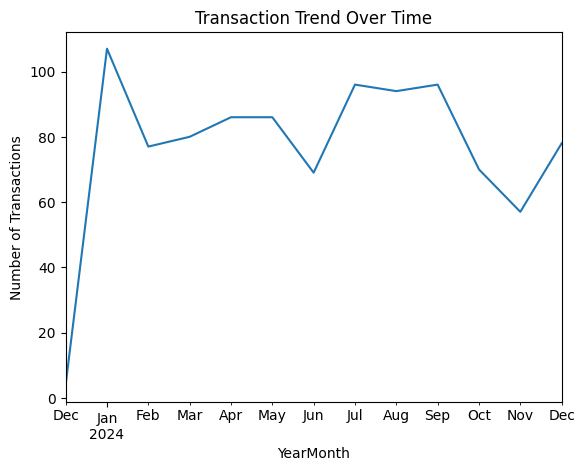


Customer Distribution by Region: 
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

Popular Product Categories: 
 Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

Top 5 Products by Quantity Sold: 
 ProductID
P054    46
P059    46
P029    45
P048    43
P057    43
Name: Quantity, dtype: int64

Total Sales per Region: 
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64

Total Sales by Product Category: 
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the Data
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Checking for missing values
print("Missing values in Customers: \n", customers.isnull().sum())
print("Missing values in Products: \n", products.isnull().sum())
print("Missing values in Transactions: \n", transactions.isnull().sum())

# Converting 'SignupDate' and 'TransactionDate' to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Descriptive statistics for numerical columns
print("\nDescriptive statistics for Customers: \n", customers.describe())
print("\nDescriptive statistics for Products: \n", products.describe())
print("\nDescriptive statistics for Transactions: \n", transactions.describe())

# Visualizations
# Distribution of customers by region
sns.countplot(data=customers, x='Region')
plt.title('Distribution of Customers by Region')
plt.show()

# Price distribution of products
sns.histplot(products['Price'], kde=True)
plt.title('Price Distribution of Products')
plt.show()

# Transaction trend over time
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
transaction_counts = transactions.groupby('YearMonth').size()
transaction_counts.plot(kind='line', title='Transaction Trend Over Time')
plt.ylabel('Number of Transactions')
plt.show()

# Merging the data from all three tables
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

# Business Insights
# Insight 1: Customer distribution by region
region_counts = customers['Region'].value_counts()
print("\nCustomer Distribution by Region: \n", region_counts)

# Insight 2: Popular product categories
product_category_counts = products['Category'].value_counts()
print("\nPopular Product Categories: \n", product_category_counts)

# Insight 3: Most frequent products purchased
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Quantity Sold: \n", top_products)

# Insight 4: Total sales per region
total_sales_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nTotal Sales per Region: \n", total_sales_region)

# Insight 5: Total sales by product category
total_sales_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nTotal Sales by Product Category: \n", total_sales_category)
